<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/%5BSuhu%5DML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [314]:
#import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [281]:
# Upload file dataset dari lokal
uploaded = files.upload()

Saving Cuaca.csv to Cuaca.csv


# **Kabupaten Lamongan / Jatim**

In [382]:
# Input data Lamongan / Jatim
input_suhu_ratarata = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_ratarata.append(float(row[1]))
    number+=1

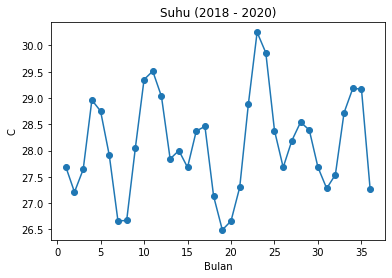

In [383]:
# Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_ratarata,marker='o')
plt.title('Suhu (2018 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

In [384]:
# Input dari data pada database
dataset = []
counter=0

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    dataset.append([])
    dataset[counter].append(float(row[1]))
    counter+=1

dataset = np.array(dataset)

print(dataset)

[[27.69]
 [27.21]
 [27.64]
 [28.96]
 [28.75]
 [27.91]
 [26.66]
 [26.67]
 [28.05]
 [29.35]
 [29.51]
 [29.03]
 [27.84]
 [28.  ]
 [27.68]
 [28.37]
 [28.46]
 [27.13]
 [26.49]
 [26.66]
 [27.3 ]
 [28.89]
 [30.25]
 [29.86]
 [28.38]
 [27.68]
 [28.19]
 [28.54]
 [28.39]
 [27.68]
 [27.28]
 [27.54]
 [28.72]
 [29.18]
 [29.17]
 [27.26]]


In [385]:
# Normalisasi dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [386]:
# Fungsi membuat sequence
def buat_sequences(dataset, window_size):
    input = []
    output = []

    for i in range(len(dataset)-window_size+1):
        window = dataset[i:(i+window_size-4), 0]
        input.append(window)
        output.append(dataset[(i+window_size-4):i+window_size, 0])
    return np.array(input),np.array(output)

window_size = 16
dataInput, dataOutput = buat_sequences(dataset, window_size)

print(len(dataInput))
print(len(dataOutput))

21
21


In [387]:
split_valid = 15
input_train, input_test = dataInput[:split_valid,:], dataInput[split_valid:,:]
output_train, output_test = dataOutput[:split_valid,:], dataOutput[split_valid:,:]

print(len(input_train))
print(len(output_train))

15
15


In [388]:
print(input_test)
print("------")
print(output_test)

[[0.5        0.52393617 0.17021277 0.         0.04521277 0.21542553
  0.63829787 1.         0.8962766  0.50265957 0.31648936 0.45212766]
 [0.52393617 0.17021277 0.         0.04521277 0.21542553 0.63829787
  1.         0.8962766  0.50265957 0.31648936 0.45212766 0.54521277]
 [0.17021277 0.         0.04521277 0.21542553 0.63829787 1.
  0.8962766  0.50265957 0.31648936 0.45212766 0.54521277 0.50531915]
 [0.         0.04521277 0.21542553 0.63829787 1.         0.8962766
  0.50265957 0.31648936 0.45212766 0.54521277 0.50531915 0.31648936]
 [0.04521277 0.21542553 0.63829787 1.         0.8962766  0.50265957
  0.31648936 0.45212766 0.54521277 0.50531915 0.31648936 0.21010638]
 [0.21542553 0.63829787 1.         0.8962766  0.50265957 0.31648936
  0.45212766 0.54521277 0.50531915 0.31648936 0.21010638 0.27925532]]
------
[[0.54521277 0.50531915 0.31648936 0.21010638]
 [0.50531915 0.31648936 0.21010638 0.27925532]
 [0.31648936 0.21010638 0.27925532 0.59308511]
 [0.21010638 0.27925532 0.59308511 0.7

In [389]:
# Ubah dimensinya untuk disesuaikan dengan model
input_train = input_train.reshape((input_train.shape[0], 1, 1, 1, seq_size-4))
input_test = input_test.reshape((input_test.shape[0], 1, 1, 1, seq_size-4))

In [390]:
print(input_test)

[[[[[0.5        0.52393617 0.17021277 0.         0.04521277 0.21542553
     0.63829787 1.         0.8962766  0.50265957 0.31648936 0.45212766]]]]



 [[[[0.52393617 0.17021277 0.         0.04521277 0.21542553 0.63829787
     1.         0.8962766  0.50265957 0.31648936 0.45212766 0.54521277]]]]



 [[[[0.17021277 0.         0.04521277 0.21542553 0.63829787 1.
     0.8962766  0.50265957 0.31648936 0.45212766 0.54521277 0.50531915]]]]



 [[[[0.         0.04521277 0.21542553 0.63829787 1.         0.8962766
     0.50265957 0.31648936 0.45212766 0.54521277 0.50531915 0.31648936]]]]



 [[[[0.04521277 0.21542553 0.63829787 1.         0.8962766  0.50265957
     0.31648936 0.45212766 0.54521277 0.50531915 0.31648936 0.21010638]]]]



 [[[[0.21542553 0.63829787 1.         0.8962766  0.50265957 0.31648936
     0.45212766 0.54521277 0.50531915 0.31648936 0.21010638 0.27925532]]]]]


In [391]:
print(output_test)

[[0.54521277 0.50531915 0.31648936 0.21010638]
 [0.50531915 0.31648936 0.21010638 0.27925532]
 [0.31648936 0.21010638 0.27925532 0.59308511]
 [0.21010638 0.27925532 0.59308511 0.71542553]
 [0.27925532 0.59308511 0.71542553 0.71276596]
 [0.59308511 0.71542553 0.71276596 0.20478723]]


In [392]:
#model machine learning
model = tf.keras.models.Sequential([
  tf.keras.layers.ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, window_size-4)),    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(4)
])

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=["mae"])

model.summary()

#fit the model
fitting_history = model.fit(input_train, output_train, validation_data=(input_test, output_test), verbose=2, epochs=100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_3 (ConvLSTM2D)  (None, 1, 1, 64)          19712     
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 132       
Total params: 21,924
Trainable params: 21,924
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 - 2s - loss: 0.2568 - mae: 0.4311 - val_loss: 0.2256 - val_mae: 0.4308
Epoch 2/100
1/1 - 0s - loss: 0.2480 - mae: 0.4217 - val_loss: 0.2165 - val_mae: 0.4203
Epoch 3/100
1/1 - 0s - loss: 0.2394 - mae: 0.4127 - val_loss: 0.2075 - val

<Figure size 432x288 with 0 Axes>

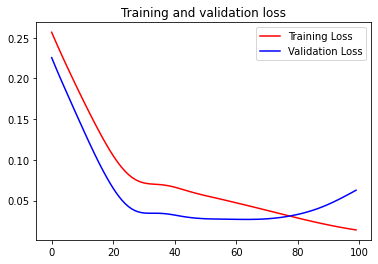

<Figure size 432x288 with 0 Axes>

In [405]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

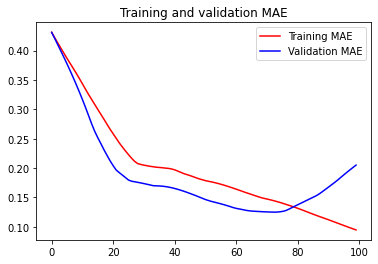

<Figure size 432x288 with 0 Axes>

In [394]:
# Grafik training and validation MAE
training_mae=fitting_history.history['mae']
validation_mae=fitting_history.history['val_mae']
epochs=range(len(training_mae))

plt.plot(epochs, training_mae, 'r', label="Training MAE")
plt.plot(epochs, validation_mae, 'b', label="Validation MAE")
plt.title('Training and validation MAE')
plt.legend(loc=0)
plt.figure()

In [406]:
# Simpan model
model.save('model-suhu.h5')

# **Testing Model**

In [ ]:
# Load the model
model = tf.keras.models.load_model('model-suhu.h5')

In [395]:
#Prediksi Data
data_prediksi = model.predict(input_test)

In [396]:
print(data_prediksi)
print("-------")
print(output_test)

[[ 0.53208566  0.44716248  0.23981088  0.00855631]
 [ 0.61022335  0.23619728 -0.00134172 -0.05492663]
 [ 0.4248959   0.02294871 -0.00529378  0.16321759]
 [ 0.16524753  0.02920042  0.2546147   0.5158992 ]
 [ 0.06097248  0.2622159   0.61834115  0.81219095]
 [ 0.24252653  0.6209504   0.8736784   0.8511748 ]]
-------
[[0.54521277 0.50531915 0.31648936 0.21010638]
 [0.50531915 0.31648936 0.21010638 0.27925532]
 [0.31648936 0.21010638 0.27925532 0.59308511]
 [0.21010638 0.27925532 0.59308511 0.71542553]
 [0.27925532 0.59308511 0.71542553 0.71276596]
 [0.59308511 0.71542553 0.71276596 0.20478723]]


In [397]:
# Inverse transform data min max
data_prediksi = scaler.inverse_transform(data_prediksi)
output_test = scaler.inverse_transform(output_test)

In [398]:
print(data_prediksi)
print("-------")
print(output_test)

[[28.490643 28.171331 27.39169  26.522171]
 [28.78444  27.378103 26.484955 26.283476]
 [28.087608 26.576286 26.470095 27.103699]
 [27.11133  26.599794 27.447351 28.429781]
 [26.719257 27.475933 28.814962 29.543839]
 [27.4019   28.824772 29.77503  29.690418]]
-------
[[28.54 28.39 27.68 27.28]
 [28.39 27.68 27.28 27.54]
 [27.68 27.28 27.54 28.72]
 [27.28 27.54 28.72 29.18]
 [27.54 28.72 29.18 29.17]
 [28.72 29.18 29.17 27.26]]


[28.54, 28.39, 27.68, 27.28]
[1, 2, 3, 4]
[28.490643, 28.171331, 27.39169, 26.522171]
[1, 2, 3, 4]


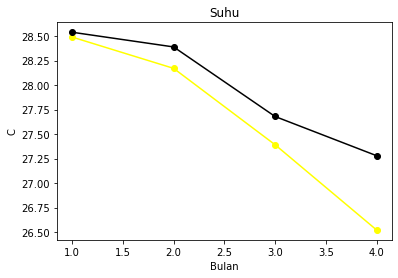

In [399]:
temp_test=[]
number=[]
count=1

for j in output_test[0]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[0]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[28.39, 27.68, 27.28, 27.54]
[1, 2, 3, 4]
[28.78444, 27.378103, 26.484955, 26.283476]
[1, 2, 3, 4]


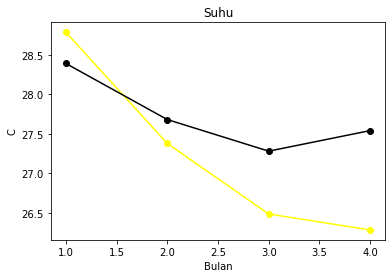

In [400]:
temp_test=[]
number=[]
count=1

for j in output_test[1]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[1]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[27.68, 27.28, 27.54, 28.72]
[1, 2, 3, 4]
[28.087608, 26.576286, 26.470095, 27.103699]
[1, 2, 3, 4]


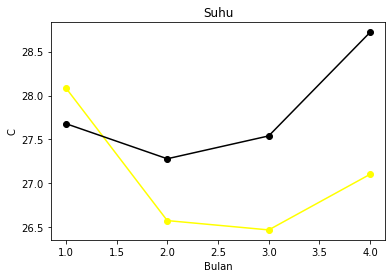

In [401]:
temp_test=[]
number=[]
count=1

for j in output_test[2]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[2]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[27.28, 27.54, 28.72, 29.18]
[1, 2, 3, 4]
[27.11133, 26.599794, 27.447351, 28.429781]
[1, 2, 3, 4]


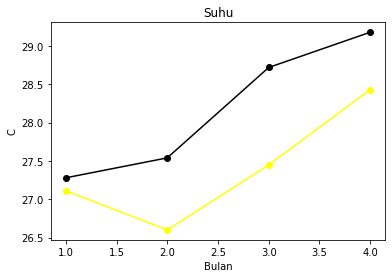

In [402]:
temp_test=[]
number=[]
count=1

for j in output_test[3]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[3]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[27.54, 28.72, 29.18, 29.17]
[1, 2, 3, 4]
[26.719257, 27.475933, 28.814962, 29.543839]
[1, 2, 3, 4]


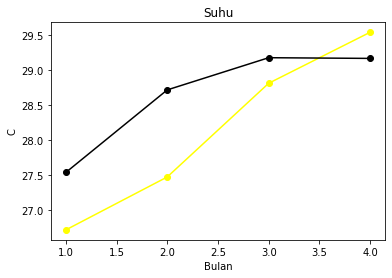

In [403]:
temp_test=[]
number=[]
count=1

for j in output_test[4]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[4]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

[28.72, 29.18, 29.17, 27.26]
[1, 2, 3, 4]
[27.4019, 28.824772, 29.77503, 29.690418]
[1, 2, 3, 4]


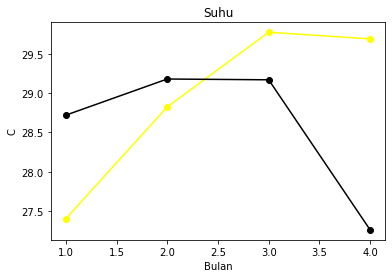

In [404]:
temp_test=[]
number=[]
count=1

for j in output_test[5]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[5]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Suhu')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()